In [30]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import pingouin as pg
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import scikit_posthocs as sp

In [31]:
df_b = pd.read_csv('../datasets/business3.csv')

In [32]:
df_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19534 entries, 0 to 19533
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   business_id        19534 non-null  object 
 1   name               19534 non-null  object 
 2   address            19467 non-null  object 
 3   city               19534 non-null  object 
 4   state              19534 non-null  object 
 5   postal_code        19532 non-null  float64
 6   latitude           19534 non-null  float64
 7   longitude          19534 non-null  float64
 8   stars              19534 non-null  float64
 9   review_count       19534 non-null  int64  
 10  is_open            19534 non-null  int64  
 11  attributes         19527 non-null  object 
 12  categories         19534 non-null  object 
 13  hours              18432 non-null  object 
 14  stability_score    19534 non-null  float64
 15  loyalty_score      19534 non-null  float64
 16  reliability_score  195

In [33]:
# 한글 폰트 설정 (Windows용)
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows 기본 한글 폰트
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 부호 깨짐 방지

# 1. 안정점수

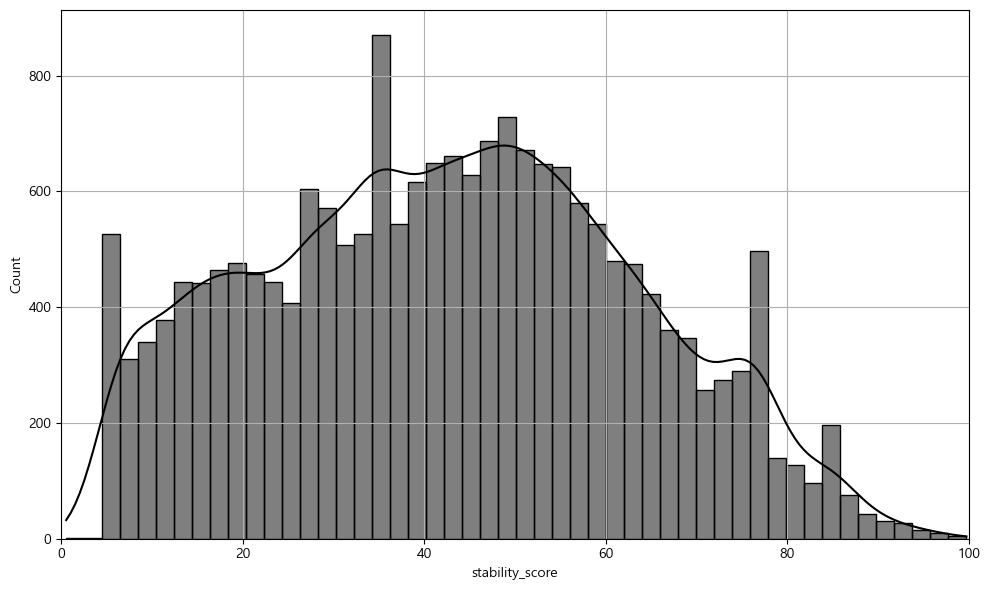

In [34]:
# Check distribution

plt.figure(figsize=(10, 6))
sns.histplot(df_b['stability_score'], bins=50, kde=True, color='black')

# plt.title('안정 점수 분포')
# plt.xlabel('Stability Score')
# plt.ylabel('Frequency')
plt.xlim(0,100)
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_12612\484501940.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


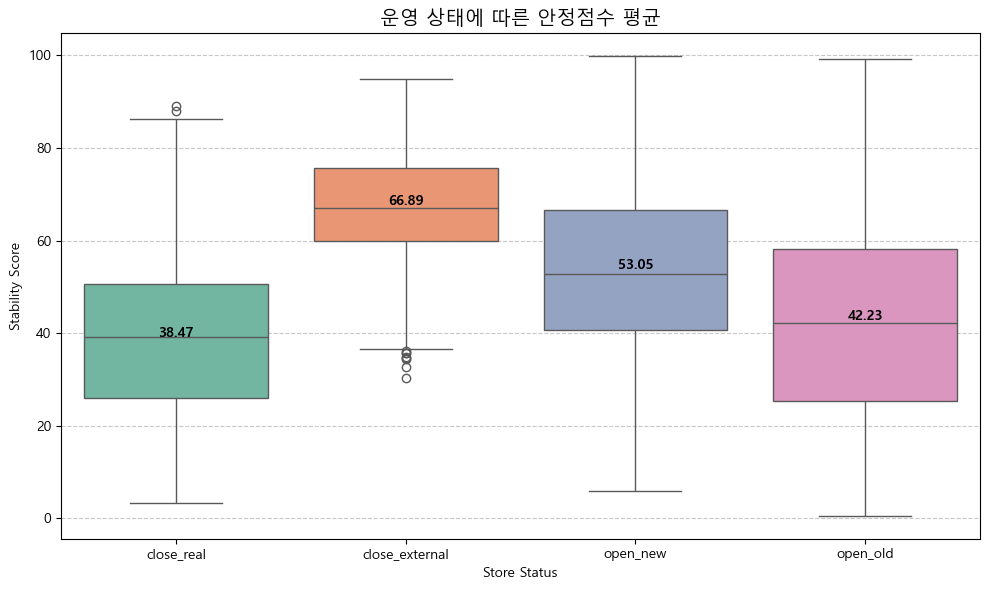

In [35]:
# -------------------------
# 1. EDA
# -------------------------

# Set plot style
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_b,
    x='store_status',
    y='stability_score',
    order=['close_real', 'close_external', 'open_new', 'open_old'],
    palette='Set2'
)

# Calculate mean per store_status
means = df_b.groupby('store_status')['stability_score'].mean()

# Add mean labels on plot
for i, status in enumerate(['close_real', 'close_external', 'open_new', 'open_old']):
    mean_val = means[status]
    plt.text(i, mean_val + 0.05,  # +0.05은 약간 위로 띄우기
             f'{mean_val:.2f}', 
             ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

# Add titles and labels
plt.title('운영 상태에 따른 안정점수 평균', fontsize=14)
plt.xlabel('Store Status')
plt.ylabel('Stability Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### 가설 1

# 2. 충성점수

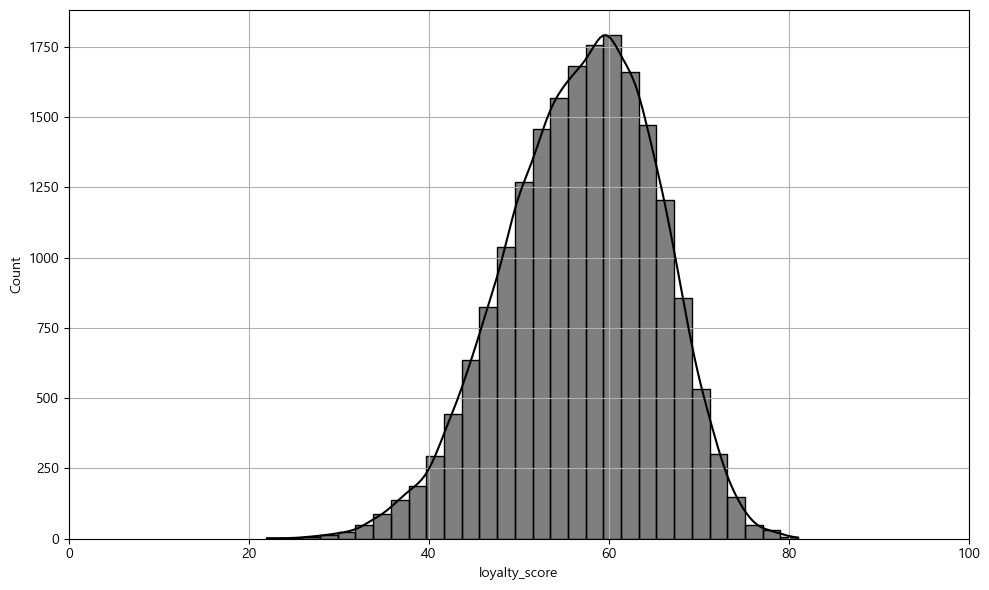

In [36]:
# Check distribution

plt.figure(figsize=(10, 6))
sns.histplot(df_b['loyalty_score'], bins=30, kde=True, color='black')

# plt.title('충성 점수 분포')
# plt.xlabel('Loyalty Score')
# plt.ylabel('Frequency')
plt.xlim(0,100)
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_12612\1491023753.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


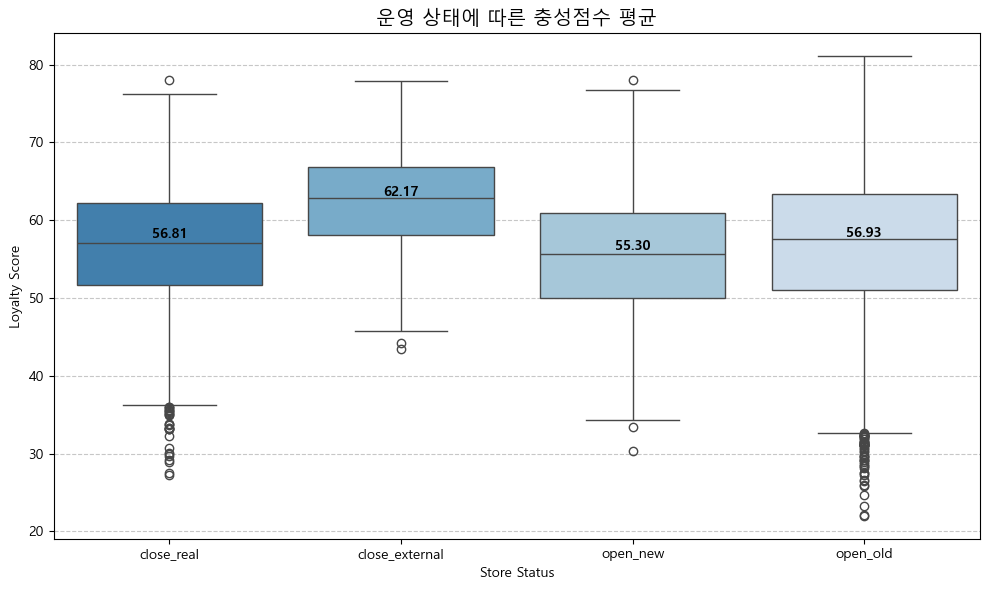

In [65]:
# -------------------------
# 1. EDA
# -------------------------

# Set plot style
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_b,
    x='store_status',
    y='loyalty_score',
    order=['close_real', 'close_external', 'open_new', 'open_old'],
    palette='tab20c'
)

# Calculate mean per store_status
means = df_b.groupby('store_status')['loyalty_score'].mean()

# Add mean labels on plot
for i, status in enumerate(['close_real', 'close_external', 'open_new', 'open_old']):
    mean_val = means[status]
    plt.text(i, mean_val + 0.5,  # +0.05은 약간 위로 띄우기
             f'{mean_val:.2f}', 
             ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

# Add titles and labels
plt.title('운영 상태에 따른 충성점수 평균', fontsize=14)
plt.xlabel('Store Status')
plt.ylabel('Loyalty Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### 가설 1 : 식당의 운영상태에 따라 충성점수의 평균에 차이가 있을 것이다.

In [38]:
# 정규성 검정

shapiro_test = stats.shapiro(df_b['loyalty_score'].dropna())
print(shapiro_test)

ShapiroResult(statistic=np.float64(0.9925511959495885), pvalue=np.float64(2.7463944537888744e-30))


c:\Users\user\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 19534.
  res = hypotest_fun_out(*samples, **kwds)


(array([   4.,    9.,   23.,   63.,  145.,  269.,  501.,  873., 1291.,
        1841., 2231., 2477., 2674., 2533., 2123., 1408.,  716.,  266.,
          68.,   19.]),
 array([22.02181818, 24.97334321, 27.92486825, 30.87639328, 33.82791831,
        36.77944335, 39.73096838, 42.68249341, 45.63401845, 48.58554348,
        51.53706851, 54.48859354, 57.44011858, 60.39164361, 63.34316864,
        66.29469368, 69.24621871, 72.19774374, 75.14926877, 78.10079381,
        81.05231884]),
 <BarContainer object of 20 artists>)

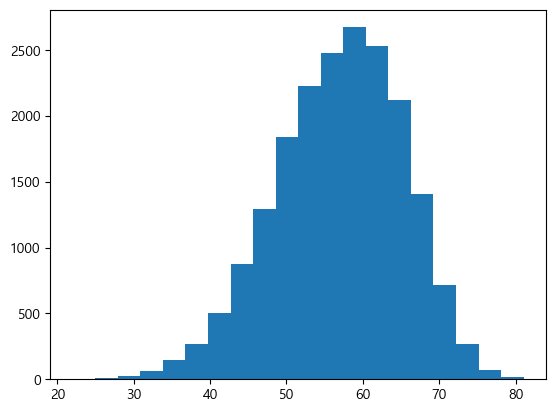

In [39]:
plt.hist(df_b['loyalty_score'], bins=20)

In [40]:
# 등분산성 검정

close_real = df_b.loc[df_b['store_status']=='close_real', 'loyalty_score'].dropna()
close_external = df_b.loc[df_b['store_status']=='close_external', 'loyalty_score'].dropna()
open_new = df_b.loc[df_b['store_status']=='open_new', 'loyalty_score'].dropna()
open_old = df_b.loc[df_b['store_status']=='open_old', 'loyalty_score'].dropna()

levene_val = stats.levene(close_real, close_external, open_new, open_old)
print(levene_val)

LeveneResult(statistic=np.float64(91.50082149158841), pvalue=np.float64(8.459395929468309e-59))


In [41]:
# Welch's ANOVA

welch = pg.welch_anova(data=df_b, dv='loyalty_score', between='store_status')
print(welch)

         Source  ddof1       ddof2           F         p-unc       np2
0  store_status      3  2003.39824  140.561748  1.185163e-82  0.013242


In [42]:
games_howell = pg.pairwise_gameshowell(data=df_b, dv='loyalty_score', between='store_status')
games_howell

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,close_external,close_real,62.169630,56.807432,5.362198,0.297542,18.021678,660.597254,0.000000e+00,0.740042
1,close_external,open_new,62.169630,55.299352,6.870278,0.341543,20.115420,1052.932654,0.000000e+00,0.969180
2,close_external,open_old,62.169630,56.926023,5.243608,0.289744,18.097406,595.005231,0.000000e+00,0.604766
3,close_real,open_new,56.807432,55.299352,1.508081,0.222374,6.781723,2214.921527,8.994361e-11,0.205560
4,close_real,open_old,56.807432,56.926023,-0.118590,0.129422,-0.916304,10998.611651,7.961521e-01,-0.014166
5,open_new,open_old,55.299352,56.926023,-1.626671,0.211827,-7.679239,1856.673876,1.538991e-12,-0.188639


### 가설2 : 식당의 loyalty_score가 높을수록 많은 리뷰를 받을 것이다.

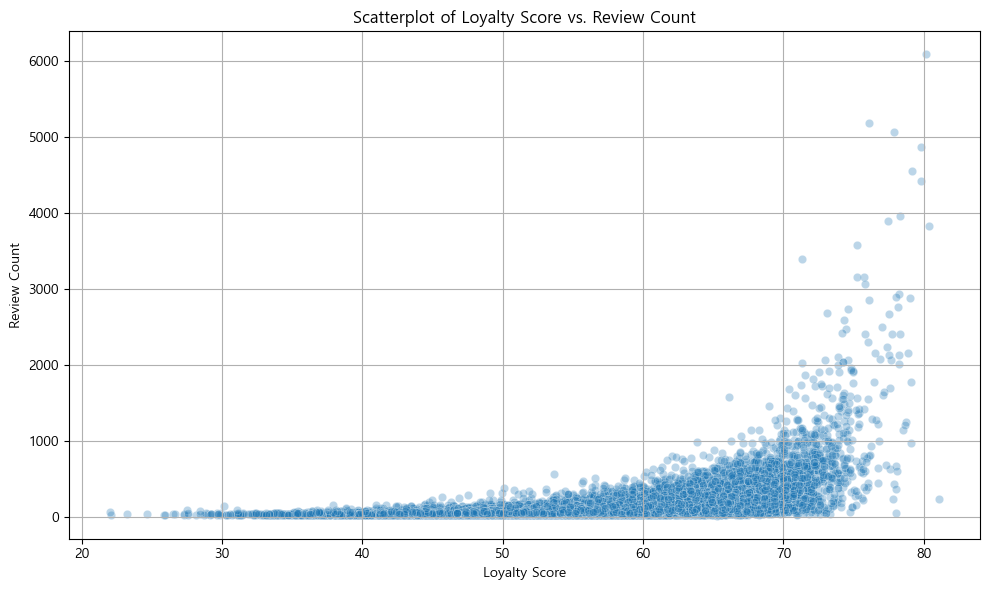

In [43]:
plt.figure(figsize=(10, 6))

# 산점도 시각화
sns.scatterplot(data=df_b, x='loyalty_score', y='review_count', alpha=0.3)

# 시각화 설정
plt.title('Scatterplot of Loyalty Score vs. Review Count')
plt.xlabel('Loyalty Score')
plt.ylabel('Review Count')
plt.grid(True)
plt.tight_layout()
plt.show()

In [44]:
# 스피어만 상관분석
spearman_corr = stats.spearmanr(df_b['review_count'], df_b['loyalty_score'])
print("📌 Spearman correlation:", spearman_corr)

📌 Spearman correlation: SignificanceResult(statistic=np.float64(0.7015413296956875), pvalue=np.float64(0.0))


In [45]:
# Load review file
df_r = pd.read_parquet("../datasets/parquet_file/review_filtered.parquet")

In [46]:
df_r.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15
5,JrIxlS1TzJ-iCu79ul40cQ,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1.0,1,2,1,I am a long term frequent customer of this est...,2015-09-23 23:10:31


In [47]:
# 1. 식당별 평균 평점 계산
stars_by_business = df_r.groupby('business_id')['stars'].mean().reset_index()
stars_by_business.rename(columns={'stars': 'stars_real'}, inplace=True)

# 2. df_b에 stars_real 컬럼으로 병합
df_b = df_b.merge(stars_by_business, on='business_id', how='left')


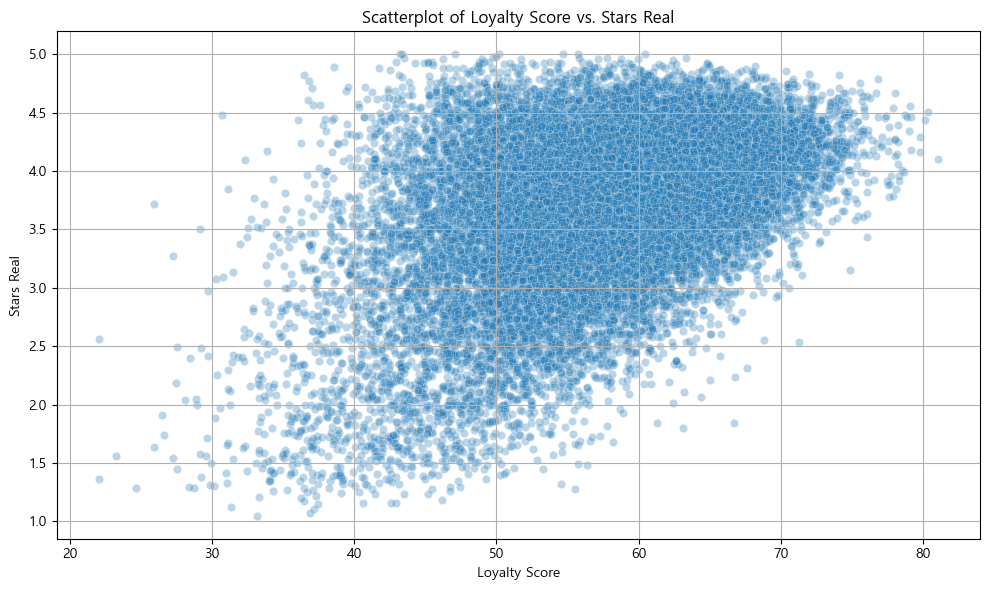

In [48]:
plt.figure(figsize=(10, 6))

# 산점도 시각화
sns.scatterplot(data=df_b, x='loyalty_score', y='stars_real', alpha=0.3)

# 시각화 설정
plt.title('Scatterplot of Loyalty Score vs. Stars Real')
plt.xlabel('Loyalty Score')
plt.ylabel('Stars Real')
plt.grid(True)
plt.tight_layout()
plt.show()

In [49]:
# 스피어만 상관분석
spearman_corr = stats.spearmanr(df_b['stars_real'], df_b['loyalty_score'])
print("📌 Spearman correlation:", spearman_corr)

📌 Spearman correlation: SignificanceResult(statistic=np.float64(0.4159269705816363), pvalue=np.float64(0.0))


### 가설 3 : loyalty_score가 높을수록 폐업 가능성이 낮을 것이다.

In [50]:
import statsmodels.api as sm

# 1. open_new, open_old, close_real만 남긴 새로운 데이터프레임 생성
df_logit = df_b[df_b['store_status'].isin(['open_new', 'open_old', 'close_real'])].copy()

# 2. is_close_real 컬럼 생성 (폐업 여부)
df_logit['is_close_real'] = (df_logit['store_status'] == 'close_real').astype(int)

# 3. 로지스틱 회귀 분석 (종속변수: is_close_real, 독립변수: loyalty_score)
X = sm.add_constant(df_logit['loyalty_score'])  # 절편 추가
y = df_logit['is_close_real']

logit_model = sm.Logit(y, X)
result = logit_model.fit()

# 결과 출력
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.578243
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:          is_close_real   No. Observations:                19021
Model:                          Logit   Df Residuals:                    19019
Method:                           MLE   Df Model:                            1
Date:                Tue, 11 Nov 2025   Pseudo R-squ.:               4.591e-06
Time:                        11:32:30   Log-Likelihood:                -10999.
converged:                       True   LL-Null:                       -10999.
Covariance Type:            nonrobust   LLR p-value:                    0.7507
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.0557      0.114     -9.300      0.000      -1.278      -0.833
loyalty_score     0.

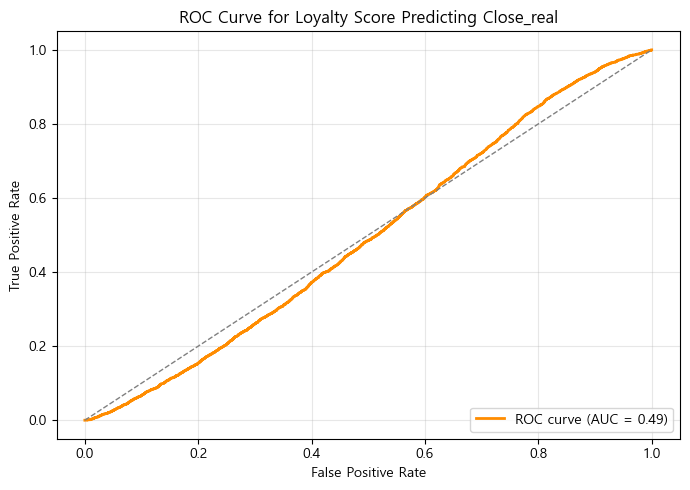

In [51]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 예측 확률 계산
df_logit['pred_prob'] = result.predict(sm.add_constant(df_logit['loyalty_score']))

# ROC 커브 계산
fpr, tpr, thresholds = roc_curve(df_logit['is_close_real'], df_logit['pred_prob'])
roc_auc = auc(fpr, tpr)

# ROC 곡선 시각화
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Loyalty Score Predicting Close_real')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# 3. 신뢰점수

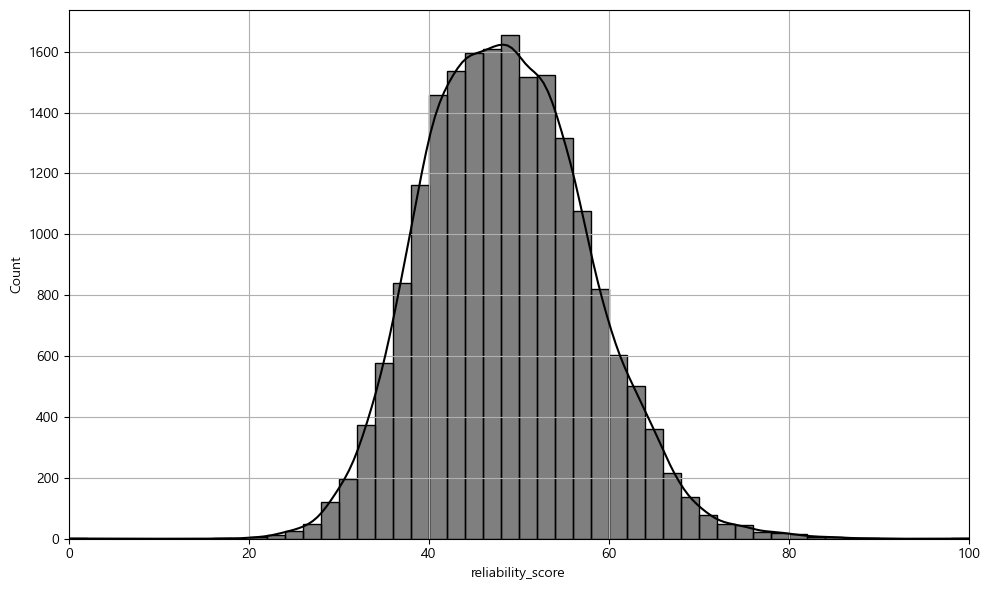

In [52]:
# Check distribution

plt.figure(figsize=(10, 6))
sns.histplot(df_b['reliability_score'], bins=50, kde=True, color='black')

# plt.title('신뢰 점수 분포')
# plt.xlabel('Reliability Score')
# plt.ylabel('Frequency')
plt.xlim(0,100)
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_12612\2051071111.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


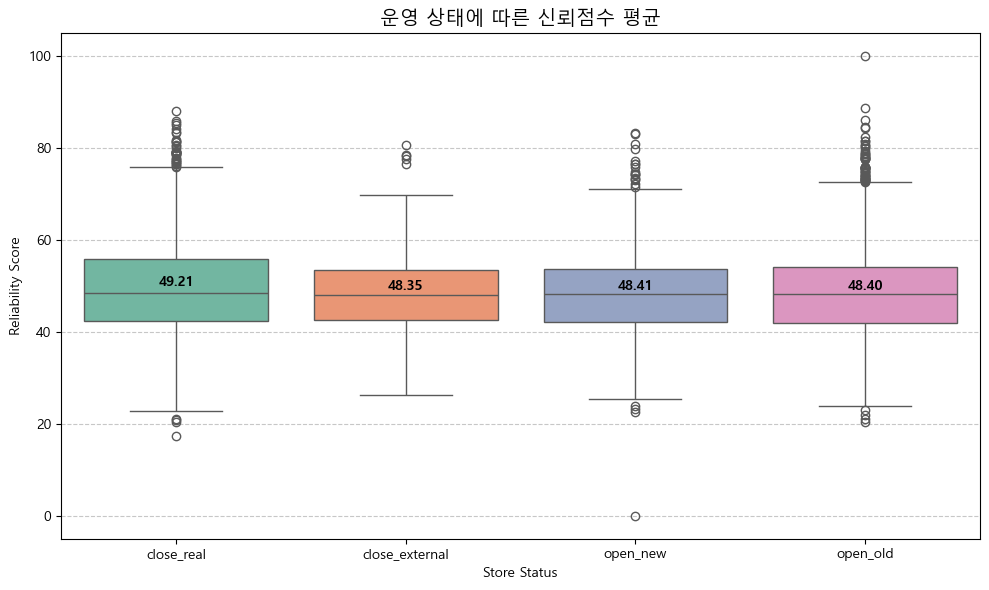

In [24]:
# -------------------------
# 1. EDA
# -------------------------

# Set plot style
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_b,
    x='store_status',
    y='reliability_score',
    order=['close_real', 'close_external', 'open_new', 'open_old'],
    palette='Set2'
)

# Calculate mean per store_status
means = df_b.groupby('store_status')['reliability_score'].mean()

# Add mean labels on plot
for i, status in enumerate(['close_real', 'close_external', 'open_new', 'open_old']):
    mean_val = means[status]
    plt.text(i, mean_val + 0.05,  # +0.05은 약간 위로 띄우기
             f'{mean_val:.2f}', 
             ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

# Add titles and labels
plt.title('운영 상태에 따른 신뢰점수 평균', fontsize=14)
plt.xlabel('Store Status')
plt.ylabel('Reliability Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()